# Project Background from Kaggle #
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimens

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change histor

*Note: Our dataset contains only the rows from the training dataset that is part of the Kaggle challenge and is therefore a subset of the 13,000 passengers.y!ion!

### The DataFrame

In [1]:
#Load libaries - loading them all. We can remove any we wind up not using.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit

#Load dataset file
df = pd.read_csv('data.csv')
df.head()


,PassengerId,Group#,GroupSize,Grouped,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,Name,Transported
0,0001_01,1,1,False,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,False,0,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,2,1,False,Earth,False,F/0/S,F,S,TRAPPIST-1e,24.0,False,109,9,25,549,44,736,Juanna Vines,True
2,0003_01,3,2,True,Europa,False,A/0/S,A,S,TRAPPIST-1e,58.0,True,43,3576,0,6715,49,10383,Altark Susent,False
3,0003_02,3,2,True,Europa,False,A/0/S,A,S,TRAPPIST-1e,33.0,False,0,1283,371,3329,193,5176,Solam Susent,False
4,0004_01,4,1,False,Earth,False,F/1/S,F,S,TRAPPIST-1e,16.0,False,303,70,151,565,2,1091,Willy Santantines,True


### Checking the DataFrame

In [2]:
df.shape

(8693, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   Group#        8693 non-null   int64  
 2   GroupSize     8693 non-null   int64  
 3   Grouped       8693 non-null   bool   
 4   HomePlanet    8492 non-null   object 
 5   CryoSleep     8476 non-null   object 
 6   Cabin         8494 non-null   object 
 7   Deck          8494 non-null   object 
 8   Side          8494 non-null   object 
 9   Destination   8511 non-null   object 
 10  Age           8514 non-null   float64
 11  VIP           8490 non-null   object 
 12  RoomService   8693 non-null   int64  
 13  FoodCourt     8693 non-null   int64  
 14  ShoppingMall  8693 non-null   int64  
 15  Spa           8693 non-null   int64  
 16  VRDeck        8693 non-null   int64  
 17  TotalSpent    8693 non-null   int64  
 18  Name          8493 non-null 

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Grouped', ylabel='count'>

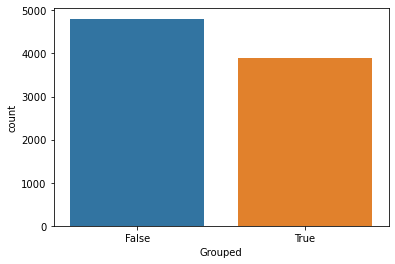

In [5]:
sns.countplot(x='Grouped', data=df)

<AxesSubplot:xlabel='Grouped', ylabel='count'>

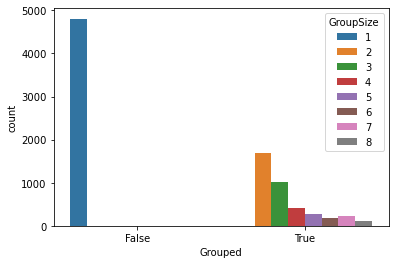

In [6]:
sns.countplot(x='Grouped', data=df, hue="GroupSize")

In [7]:
df.isna().sum()

PassengerId       0
Group#            0
GroupSize         0
Grouped           0
HomePlanet      201
CryoSleep       217
Cabin           199
Deck            199
Side            199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
TotalSpent        0
Name            200
Transported       0
dtype: int64

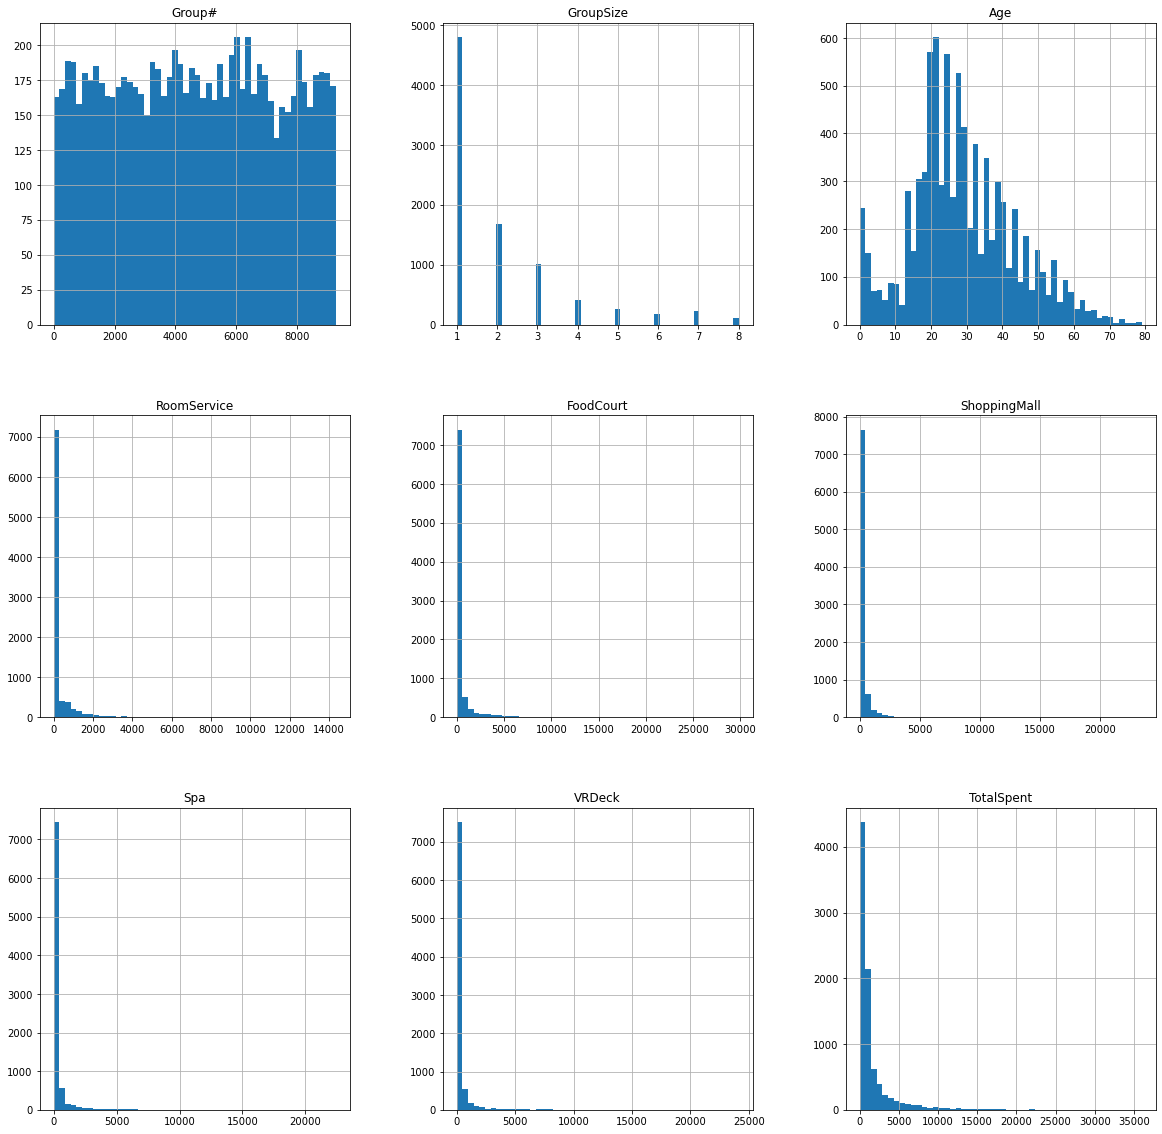

In [8]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,20))
plt.show()

In [9]:
(df['Age'].isna().sum()/len(df['Age']))*100

2.0591280340503855

In [10]:
(df['HomePlanet'].isna().sum()/len(df['HomePlanet']))*100

2.312205222592891

In [11]:
(df['Cabin'].isna().sum()/len(df['Cabin']))*100

2.289198205452663

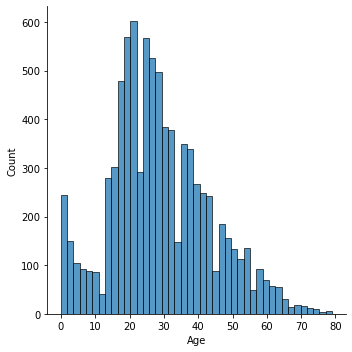

In [12]:
sns.displot(x='Age', data=df)

In [13]:
df.head()

,PassengerId,Group#,GroupSize,Grouped,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,Name,Transported
0,0001_01,1,1,False,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,False,0,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,2,1,False,Earth,False,F/0/S,F,S,TRAPPIST-1e,24.0,False,109,9,25,549,44,736,Juanna Vines,True
2,0003_01,3,2,True,Europa,False,A/0/S,A,S,TRAPPIST-1e,58.0,True,43,3576,0,6715,49,10383,Altark Susent,False
3,0003_02,3,2,True,Europa,False,A/0/S,A,S,TRAPPIST-1e,33.0,False,0,1283,371,3329,193,5176,Solam Susent,False
4,0004_01,4,1,False,Earth,False,F/1/S,F,S,TRAPPIST-1e,16.0,False,303,70,151,565,2,1091,Willy Santantines,True


In [14]:
df.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

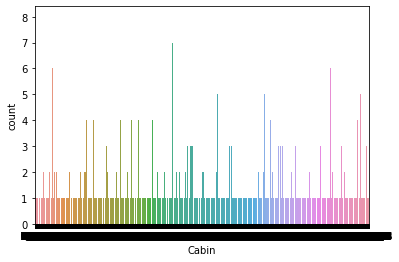

In [15]:
sns.countplot(x='Cabin', data=df)

In [16]:
df.Deck

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Deck, Length: 8693, dtype: object

<AxesSubplot:xlabel='Deck', ylabel='count'>

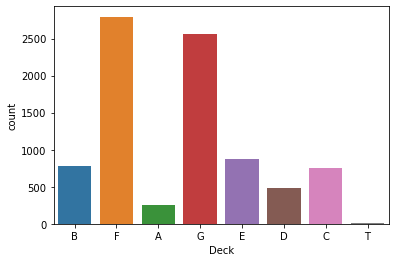

In [17]:
sns.countplot(x='Deck', data=df)

In [18]:
df.Side

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

<AxesSubplot:xlabel='Side', ylabel='count'>

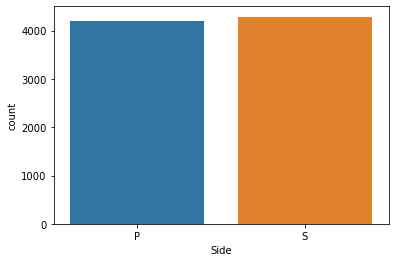

In [19]:
sns.countplot(x='Side', data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

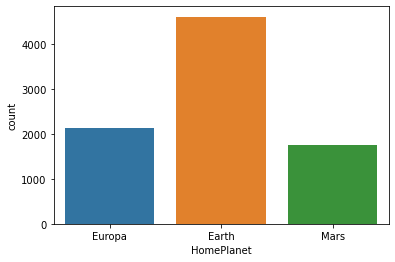

In [20]:
sns.countplot(x='HomePlanet', data=df)

<AxesSubplot:xlabel='Destination', ylabel='count'>

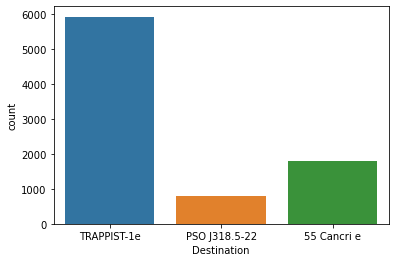

In [21]:
sns.countplot(x='Destination', data=df)

<AxesSubplot:xlabel='VIP', ylabel='count'>

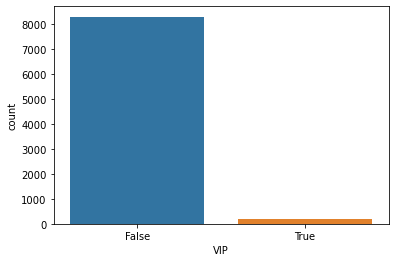

In [22]:
sns.countplot(x='VIP', data=df)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

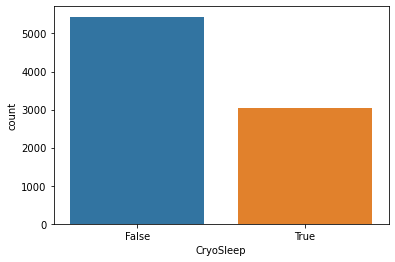

In [23]:
sns.countplot(x='CryoSleep', data=df)

### Data Cleaning

###### After checking all the columns and instances, dropping some columns and fixing some the null values. The null values that are not too much is just dropping to make dataset clean.

In [24]:
df.drop(['Name','PassengerId','Cabin','Deck','Side','CryoSleep','VIP','GroupSize','Transported'], axis = 1, inplace = True)
df.head()

,Group#,Grouped,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,1,False,Europa,TRAPPIST-1e,39.0,0,0,0,0,0,0
1,2,False,Earth,TRAPPIST-1e,24.0,109,9,25,549,44,736
2,3,True,Europa,TRAPPIST-1e,58.0,43,3576,0,6715,49,10383
3,3,True,Europa,TRAPPIST-1e,33.0,0,1283,371,3329,193,5176
4,4,False,Earth,TRAPPIST-1e,16.0,303,70,151,565,2,1091


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group#        8693 non-null   int64  
 1   Grouped       8693 non-null   bool   
 2   HomePlanet    8492 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   RoomService   8693 non-null   int64  
 6   FoodCourt     8693 non-null   int64  
 7   ShoppingMall  8693 non-null   int64  
 8   Spa           8693 non-null   int64  
 9   VRDeck        8693 non-null   int64  
 10  TotalSpent    8693 non-null   int64  
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 687.8+ KB


In [26]:
new_data=df.dropna()
new_data

,Group#,Grouped,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,1,False,Europa,TRAPPIST-1e,39.0,0,0,0,0,0,0
1,2,False,Earth,TRAPPIST-1e,24.0,109,9,25,549,44,736
2,3,True,Europa,TRAPPIST-1e,58.0,43,3576,0,6715,49,10383
3,3,True,Europa,TRAPPIST-1e,33.0,0,1283,371,3329,193,5176
4,4,False,Earth,TRAPPIST-1e,16.0,303,70,151,565,2,1091
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,False,Europa,55 Cancri e,41.0,0,6819,0,1643,74,8536
8689,9278,False,Earth,PSO J318.5-22,18.0,0,0,0,0,0,0
8690,9279,False,Earth,TRAPPIST-1e,26.0,0,0,1872,1,0,1873
8691,9280,True,Europa,55 Cancri e,32.0,0,1049,0,353,3235,4637


###### After processing the dataset, again rechecking if there are any null values in there.

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group#        8140 non-null   int64  
 1   Grouped       8140 non-null   bool   
 2   HomePlanet    8140 non-null   object 
 3   Destination   8140 non-null   object 
 4   Age           8140 non-null   float64
 5   RoomService   8140 non-null   int64  
 6   FoodCourt     8140 non-null   int64  
 7   ShoppingMall  8140 non-null   int64  
 8   Spa           8140 non-null   int64  
 9   VRDeck        8140 non-null   int64  
 10  TotalSpent    8140 non-null   int64  
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 707.5+ KB


In [28]:
new_data.head()

,Group#,Grouped,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,1,False,Europa,TRAPPIST-1e,39.0,0,0,0,0,0,0
1,2,False,Earth,TRAPPIST-1e,24.0,109,9,25,549,44,736
2,3,True,Europa,TRAPPIST-1e,58.0,43,3576,0,6715,49,10383
3,3,True,Europa,TRAPPIST-1e,33.0,0,1283,371,3329,193,5176
4,4,False,Earth,TRAPPIST-1e,16.0,303,70,151,565,2,1091


In [29]:
new_data.describe()

,Group#,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
count,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000
mean,4636.582801,28.802088,221.946192,456.192629,172.294840,303.902703,300.784029,1455.120393
std,2674.995075,14.522249,670.919132,1624.107827,607.051219,1115.427014,1150.618104,2828.987860
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2312.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4625.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,717.000000
75%,6891.250000,38.000000,42.000000,63.250000,23.000000,54.000000,40.000000,1453.500000
max,9280.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


###### Spliting the Variables into X and Y. Here Y is targeted variable.

In [30]:
X = new_data[['Group#','HomePlanet', 'Destination','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpent']]
Y = new_data['Grouped']

In [31]:
X

,Group#,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,1,Europa,TRAPPIST-1e,39.0,0,0,0,0,0,0
1,2,Earth,TRAPPIST-1e,24.0,109,9,25,549,44,736
2,3,Europa,TRAPPIST-1e,58.0,43,3576,0,6715,49,10383
3,3,Europa,TRAPPIST-1e,33.0,0,1283,371,3329,193,5176
4,4,Earth,TRAPPIST-1e,16.0,303,70,151,565,2,1091
...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,55 Cancri e,41.0,0,6819,0,1643,74,8536
8689,9278,Earth,PSO J318.5-22,18.0,0,0,0,0,0,0
8690,9279,Earth,TRAPPIST-1e,26.0,0,0,1872,1,0,1873
8691,9280,Europa,55 Cancri e,32.0,0,1049,0,353,3235,4637


In [32]:
Y

0       False
1       False
2        True
3        True
4       False
        ...  
8688    False
8689    False
8690    False
8691     True
8692     True
Name: Grouped, Length: 8140, dtype: bool

In [33]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

#verifying the sets' shapes
trainX.shape, testX.shape, trainY.shape, testY.shape

((6512, 10), (1628, 10), (6512,), (1628,))

###### After splitting columns, converting categorical values into neumerical values for both train and test dataset

In [34]:
cat_cols = [column for column in trainX.columns if trainX[column].dtypes == object]

trainX = pd.get_dummies(trainX, columns=cat_cols)

trainX.head()

,Group#,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3180,3428,27.0,0,18481,0,2,3875,22358,0,1,0,0,0,1
6334,6702,50.0,0,0,0,0,0,0,1,0,0,0,0,1
3457,3716,18.0,18,2,1769,1,2,1792,1,0,0,0,0,1
5204,5551,22.0,0,0,0,0,0,0,1,0,0,0,0,1
4801,5127,31.0,0,679,0,0,213,892,1,0,0,0,0,1


In [35]:
cat_cols = [column for column in testX.columns if testX[column].dtypes == object]

testX = pd.get_dummies(testX, columns=cat_cols)

testX.head()

,Group#,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3621,3895,5.0,0,0,0,0,0,0,0,0,1,0,0,1
3024,3279,9.0,0,0,0,0,0,0,0,1,0,1,0,0
5779,6121,55.0,916,1056,0,1677,593,4242,0,1,0,0,0,1
5038,5387,48.0,581,6,1,158,0,746,0,0,1,0,0,1
847,911,32.0,2492,0,0,136,4,2632,0,0,1,0,0,1


###### Using to fit Logistic Regression model, Decision tree model, and Random Forest model on train dataset. Accuracy of training data and test data.

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)              #create a LogisticRegression model
lr.fit(trainX, trainY)                           #fit the model

lr.score(trainX, trainY)  

0.6357493857493858

In [37]:
print('training accuracy:',lr.score(trainX, trainY))
print('testing accuracy:',lr.score(testX, testY))

training accuracy: 0.6357493857493858
testing accuracy: 0.652948402948403


In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(trainX, trainY)

tree.score(trainX, trainY)  

1.0

In [40]:
print('training accuracy:',tree.score(trainX, trainY))
print('testing accuracy:',tree.score(testX, testY))

training accuracy: 1.0
testing accuracy: 0.6068796068796068


In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(trainX, trainY)

forest.score(trainX, trainY)

0.953009828009828

###### Fine Tuning Logistic Regression Model

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.001, 0.005, 0.01, 0.07, 0.2, 0.5, 3 , 5, 10, 50, 100]}]

logistic = LogisticRegression(penalty='l2', multi_class='ovr', max_iter=5000)

grid_search = GridSearchCV(logistic, param_grid, cv=7, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=7,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr'),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.07, 0.2, 0.5, 3, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

In [43]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.5}
0.6678427470915602


In [44]:
best_l2_logistic = grid_search.best_estimator_

best_l2_logistic.score(testX, testY)

0.652948402948403

In [45]:
param_grid = [{'C': [0.001, 0.005, 0.01, 0.07, 0.2, 0.5, 3 , 5, 10, 50, 100]}]

#now we need to specify penalty to l1
#also, we need to set solver to 'liblinear' because the default solver doesn't support l1
logistic = LogisticRegression(penalty='l1', multi_class='ovr', max_iter=5000, solver='saga')

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          penalty='l1', solver='saga'),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.07, 0.2, 0.5, 3, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

In [46]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.2}
0.6194752037422797


In [47]:
best_l1_logistic = grid_search.best_estimator_

best_l1_logistic.score(testX, testY)

0.6074938574938575

In [48]:
logistic = LogisticRegression(penalty='elasticnet', multi_class='ovr', max_iter=5000, solver='saga')

param_grid = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.25, 0.5, 0.75]
}]

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.25, 0.5, 0.75]}],
             return_train_score=True, scoring='accuracy')

In [49]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'l1_ratio': 0.25}
0.6194752037422797


In [50]:
best_enet_logistic = grid_search.best_estimator_

best_enet_logistic.score(testX, testY)

0.6074938574938575

##### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [55]:
pd.DataFrame(confusion_matrix(testY, predict), columns = ['Predicted No','Predicted Yes'], index = ['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,701,192
Actual Yes,373,362


###### Precision, Recall, F1 Score, Support of the targeted values Test data.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(testY, predict))

              precision    recall  f1-score   support

       False       0.65      0.78      0.71       893
        True       0.65      0.49      0.56       735

    accuracy                           0.65      1628
   macro avg       0.65      0.64      0.64      1628
weighted avg       0.65      0.65      0.64      1628

